In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# подключение к данным
raw_data = pd.read_csv('data/cars.csv')

# переопределим названия полей
cars = raw_data.rename(columns = {
    'Car ID' : 'car_id',
    'Brand' : 'brand',
    'Year' : 'year',
    'Engine Size' : 'eng_size',
    'Fuel Type' : 'fuel_type',
    'Transmission' : 'trans',
    'Mileage' : 'mil',
    'Condition' : 'condition',
    'Price' : 'price',
    'Model' : 'model'
})

display(cars.sample(5))

,car_id,brand,year,eng_size,fuel_type,trans,mil,condition,price,model
1968,1969,Ford,2019,4.1,Hybrid,Manual,16738,Like New,24102.43,Fiesta
2369,2370,BMW,2005,5.2,Electric,Manual,149967,New,56141.29,X3
1159,1160,Toyota,2019,4.2,Diesel,Automatic,58097,Used,13322.64,Camry
753,754,Toyota,2004,2.8,Hybrid,Manual,15250,Used,73292.09,Prius
983,984,Mercedes,2018,4.4,Hybrid,Manual,124726,Used,58358.86,E-Class


In [3]:
# Беглый взгляд на данные
cars.info()
round(cars.describe(include="number"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   car_id     2500 non-null   int64  
 1   brand      2500 non-null   object 
 2   year       2500 non-null   int64  
 3   eng_size   2500 non-null   float64
 4   fuel_type  2500 non-null   object 
 5   trans      2500 non-null   object 
 6   mil        2500 non-null   int64  
 7   condition  2500 non-null   object 
 8   price      2500 non-null   float64
 9   model      2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


,car_id,year,eng_size,mil,price
count,2500.0,2500.0,2500.0,2500.0,2500.0
mean,1250.0,2012.0,3.0,149750.0,52638.0
std,722.0,7.0,1.0,87920.0,27296.0
min,1.0,2000.0,1.0,15.0,5011.0
25%,626.0,2005.0,2.0,71832.0,28908.0
50%,1250.0,2012.0,3.0,149085.0,53485.0
75%,1875.0,2018.0,5.0,225990.0,75839.0
max,2500.0,2023.0,6.0,299967.0,99983.0


# Описательная статистика

## Среднее

Чтобы вычислить выборочное среднее, нужно сложить все значения и разделить на их количество. Воспользуемся библиотекой Pands для нахождения среднего значения по году без учета марки и прочих параметров. 

In [4]:
# Оставляем только числовые данные
select_numbers = cars.select_dtypes(include=['number'])

# Агрегируем, получая сумму, количество и среднее
cars_group_year = select_numbers.groupby('year').agg(['sum', 'count', 'mean'])

# Округлим до 2 знаков после запятой
cars_group_year = cars_group_year.round(2)

# Смотрим на данные
display(cars_group_year['price'])

,sum,count,mean
year,,,
2000,4937757.20,93,53094.16
2001,5334902.29,109,48944.06
2002,6291722.36,110,57197.48
2003,6166702.11,118,52260.19
2004,5151797.69,100,51517.98
2005,5926035.33,103,57534.32
2006,4595633.25,86,53437.60
2007,6211062.39,110,56464.20
2008,5788421.97,109,53104.79


Построим простую визуализацию для отображения данных 

Для начала используем matplotlib

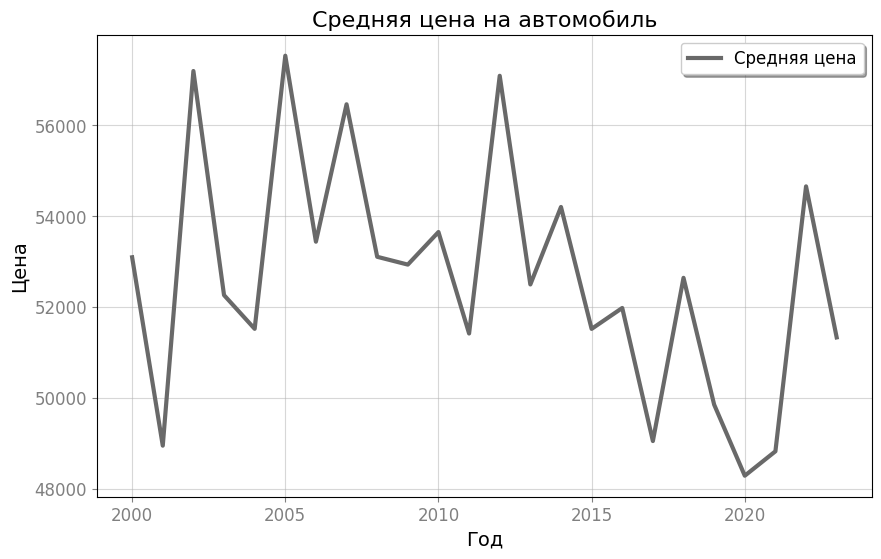

In [6]:
years = cars_group_year.index  # Выбираем данные для отображения на оси X
prices = cars_group_year[('price', 'mean')]  # Двухуровневый столбец из агрегации

plt.figure(figsize=(10, 6))  # Определяем размеры будущего графика

# Добавляем параметр label для графика
plt.plot(years, prices, linestyle='-', linewidth=3, color='#696969', label='Средняя цена')

# Настройка заголовков и подписей
plt.title('Средняя цена на автомобиль', fontsize=16)  # Заголовок
plt.xlabel('Год', fontsize=14)  # Подпись по оси X
plt.ylabel('Цена', fontsize=14)  # Подпись по оси Y

# Добавляем сетку
plt.grid(True, alpha=0.5)

# Настройка подписей осей
plt.tick_params(axis='both', labelsize=12, colors='gray')

# Добавляем легенду
plt.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)

# Отображаем график
plt.show()

По аналогии построим график в seaborn

<Axes: xlabel='year', ylabel='price'>

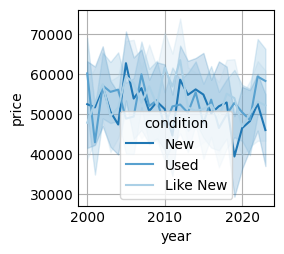

In [ ]:
sns.lineplot(x = cars['year'], 
             y = cars['price'],
             hue = cars['condition'],
             data = cars)